#Authors
**Author 1 (name and surname):** Alan García Justel

**Author 2 (name and surname):** < Put your name and surname here >

# Preamble: download and unzip image folder

In [ ]:
!wget -O images.zip https://ehubox.ehu.eus/s/zT94bekiNTaTDpX/download
!unzip images.zip

--2025-02-16 17:55:50--  https://ehubox.ehu.eus/s/zT94bekiNTaTDpX/download
Resolving ehubox.ehu.eus (ehubox.ehu.eus)... 158.227.0.95
Connecting to ehubox.ehu.eus (ehubox.ehu.eus)|158.227.0.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1504636 (1.4M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]   1.43M   958KB/s    in 1.5s    

2025-02-16 17:55:52 (958 KB/s) - ‘images.zip’ saved [1504636/1504636]

Archive:  images.zip
replace images/cat.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace images/flowers.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!pip install opencv-python

In [ ]:
from skimage import color
import numpy as np
import cv2

import matplotlib.pyplot as plt

#Exercise 1:
Suppose the intensity component of an HSV image was thresholded to just two values (black and white). **Q1:** How would this affect the appearance of the image?

## Answer
**Q1: How would this affect the appearance of the image?**

Thresholding the intensity (V) of an HSV image to just two values (0 for black and 255 for white) creates a binary effect:

    Low-intensity areas (V ≤ threshold): Become completely black.

    High-intensity areas (V > threshold): Become completely white.

This results in a high-contrast image, losing all intermediate intensity details. While it can highlight edges or specific features, it removes texture and shading information, simplifying the image significantly.

#Exercise 2:
Threshold the intensity component of a color image, say `flowers.jpg`, and see if the result agrees with your guess from question 2 above.

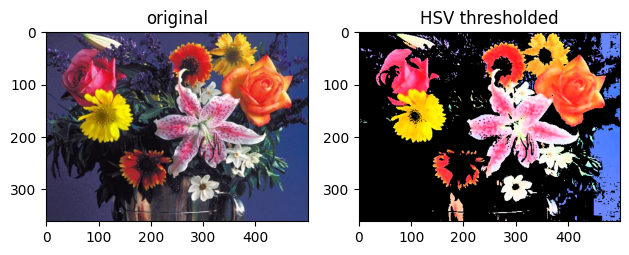

In [ ]:
flower_image = cv2.imread("images/flowers.jpg") # Read image as BGR (H, W, C)
flower_image = cv2.cvtColor(flower_image, cv2.COLOR_BGR2RGB) # Convert to RGB

f, axes = plt.subplots(1, 2)
axes[0].imshow(flower_image)
axes[0].set_title('original')

# Conver V from HSV format to 0 or 255 values
flower_hsv = cv2.cvtColor(flower_image, cv2.COLOR_RGB2HSV)
threshold_value = 127 # Mid value 0-255
v_thresholded = np.where(flower_hsv[:, :, 2] > threshold_value, 255, 0)
flower_hsv[:, :, 2] = v_thresholded

axes[1].set_title('HSV thresholded')
axes[1].imshow(cv2.cvtColor(flower_hsv, cv2.COLOR_HSV2RGB))

plt.tight_layout()
plt.show()


#Exercise 3
View the image `autumn.tif`. Experiment with histogram equalization (using the different functions learned in lab 2) on:
* the intensity component of HSV,
* the intensity component of YIQ.

**Q3:** Which seems to produce the best result?


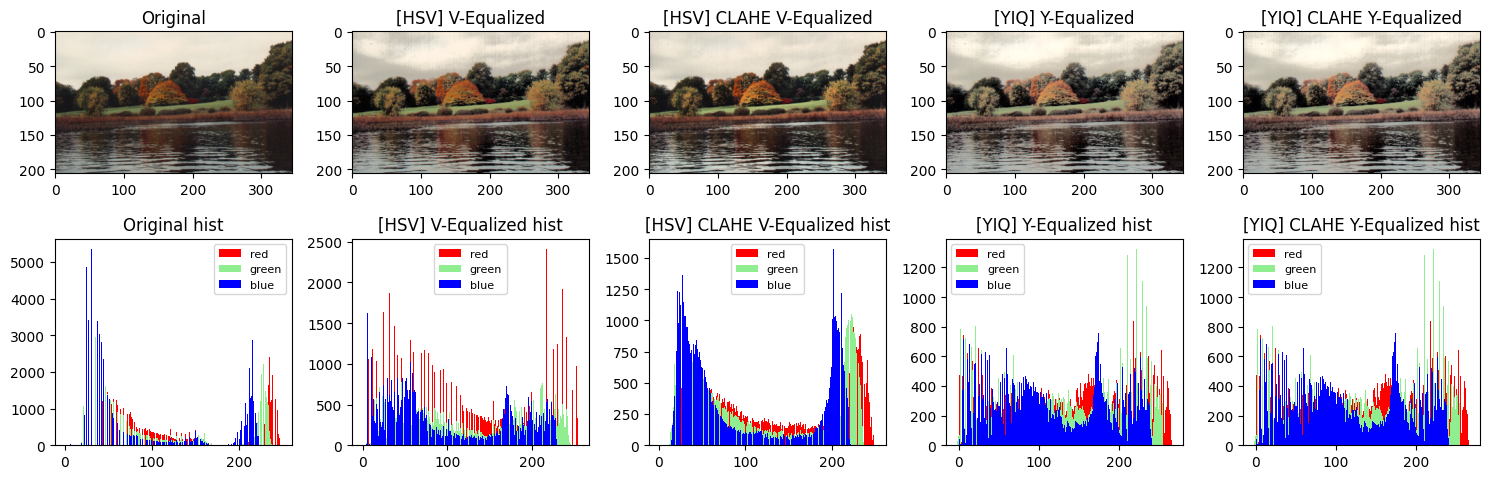

In [ ]:
autumn_image = cv2.imread("images/autumn.tif") # Read image BGR (H, W, C)
autumn_image = cv2.cvtColor(autumn_image, cv2.COLOR_BGR2RGB) # Convert to RGB

def show_channels_hist(ax, image, title="", labels=['red', 'green', 'blue'], colors=['red', 'lightgreen', 'blue']):
  ax.hist(image[:,:, 0].ravel(), bins=256, label=labels[0], color=colors[0])
  ax.hist(image[:,:, 1].ravel(), bins=256, label=labels[1], color=colors[1])
  ax.hist(image[:,:, 2].ravel(), bins=256, label=labels[2], color=colors[2])
  ax.set_title(title)
  ax.legend(prop={'size': 8})

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Equalize hist on V channel from HSV format
autumn_hsv = cv2.cvtColor(autumn_image, cv2.COLOR_RGB2HSV) # Convert to HSV
autumn_hsv_eq       = autumn_hsv.copy()
autumn_hsv_eq_CLAHE = autumn_hsv.copy()

autumn_hsv_eq[:, :, 2]        = cv2.equalizeHist(autumn_hsv_eq[:, :, 2])    # eq V channel
autumn_hsv_eq_CLAHE[:, :, 2]  = clahe.apply(autumn_hsv_eq_CLAHE[:, :, 2])   # CLAHE eq V channel
autumn_hsv_eq       = cv2.cvtColor(autumn_hsv_eq, cv2.COLOR_HSV2RGB)        # to RGB for viewing
autumn_hsv_eq_CLAHE = cv2.cvtColor(autumn_hsv_eq_CLAHE, cv2.COLOR_HSV2RGB)  # to RGB for viewing


# Equalize hist on channel from YIQ format
autumn_yiq = color.rgb2yiq(autumn_image) # Convert to YIQ
autumn_yiq_eq       = autumn_yiq.copy()
autumn_yiq_eq_CLAHE = autumn_yiq.copy()

aux = (autumn_yiq_eq[:, :, 0] * 255.0).astype(np.uint8) # convert channel to 8-bit for hist eq
aux = cv2.equalizeHist(aux) # eq Y normalized channel
autumn_yiq_eq[:, :, 0] = aux / 255.0 # convert back to float

aux = (autumn_yiq_eq_CLAHE[:, :, 0] * 255.0).astype(np.uint8) # convert channel to 8-bit for hist eq
aux = cv2.equalizeHist(aux)  # eq Y normalized channel
autumn_yiq_eq_CLAHE[:, :, 0] = aux / 255.0 # convert back to float

autumn_yiq_eq       = color.yiq2rgb(autumn_yiq_eq)        # to RGB for viewing
autumn_yiq_eq_CLAHE = color.yiq2rgb(autumn_yiq_eq_CLAHE)  # to RGB for viewing

# Show images
f, axes = plt.subplots(2, 5, figsize=(15, 5))
# Original
axes[0, 0].set_title('Original')
axes[0, 0].imshow(autumn_image)
show_channels_hist(axes[1, 0], autumn_image, title="Original hist")

# HSV V-Equalized
axes[0, 1].set_title('[HSV] V-Equalized')
axes[0, 1].imshow(autumn_hsv_eq)
show_channels_hist(axes[1, 1], autumn_hsv_eq, title="[HSV] V-Equalized hist")

# HSV CLAHE V-Equalized
axes[0, 2].set_title('[HSV] CLAHE V-Equalized')
axes[0, 2].imshow(autumn_hsv_eq_CLAHE)
show_channels_hist(axes[1, 2], autumn_hsv_eq_CLAHE, title="[HSV] CLAHE V-Equalized hist")

# YIQ V-Equalized
axes[0, 3].set_title('[YIQ] Y-Equalized')
axes[0, 3].imshow(autumn_yiq_eq)
show_channels_hist(axes[1, 3], autumn_yiq_eq*255, title="[YIQ] Y-Equalized hist")

# YIQ CLAHE V-Equalized
axes[0, 4].set_title('[YIQ] CLAHE Y-Equalized')
axes[0, 4].imshow(autumn_yiq_eq_CLAHE)
show_channels_hist(axes[1, 4], autumn_yiq_eq_CLAHE*255, title="[YIQ] CLAHE Y-Equalized hist")



plt.tight_layout()
plt.show()

## Answer
**Q3: Which seems to produce the best result?**

In my opinion, HSV equalization produces more visually appealing images. This is likely because adjusting the V channel in the HSV color space preserves vivid and consistent colors while enhancing contrast and brightness.

#Exercise 4
Using the flowers image, see if you can obtain an edge image from the intensity component alone, that is as close as possible to the image `fe2` in the tutorial. **Q4.1:** What threshold method or value did you use? **Q4.2:** How close to `fe2` could you get? (describe what you think is missing from your best result to match `fe2`)

In [ ]:
!pip install scikit-learn

[HSV] Bin Threshold: 0.1940152774767445 | IoU (Jaccard index) with fe2: 0.09763364464561966
[YIQ] Bin Threshold: 0.13496142430249725 | IoU (Jaccard index) with fe2: 0.5992825049632545


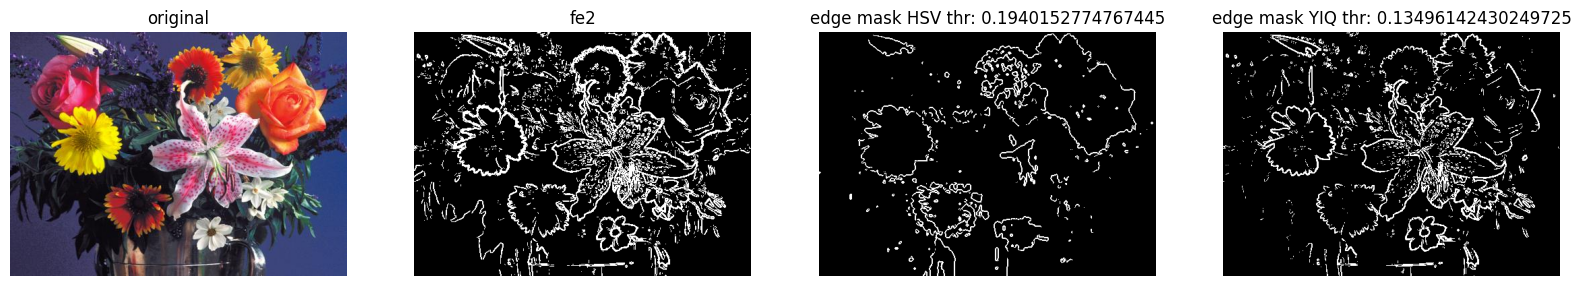

In [ ]:
from skimage.filters import sobel
from skimage.filters import threshold_otsu
from sklearn.metrics import jaccard_score

flower_image = cv2.imread("images/flowers.jpg") # Read image as BGR (H, W, C)
flower_image = cv2.cvtColor(flower_image, cv2.COLOR_BGR2RGB) # Convert to RGB

# From the tutorial
fr = sobel( flower_image[:,:,0] ) # R
fr = fr > threshold_otsu( fr )
fg = sobel( flower_image[:,:,1] ) # G
fg = fg > threshold_otsu( fg )
fb = sobel( flower_image[:,:,2] ) # B
fb = fb > threshold_otsu( fb )
fe2 = fr | fg | fb

# HSV color space
flower_hsv = cv2.cvtColor(flower_image, cv2.COLOR_RGB2HSV) # Convert to HSV
fe_hsv = sobel( flower_hsv[:, :, 0] ) # Sobel in the Y channel
thr_hsv = threshold_otsu( fe_hsv )
fe_hsv = fe_hsv > thr_hsv
iou_hsv = jaccard_score(fe2.ravel(), fe_hsv.ravel())
print(f"[HSV] Bin Threshold: {thr_hsv} | IoU (Jaccard index) with fe2: {iou_hsv}")


# YIQ color space
flower_yiq = color.rgb2yiq(flower_image)
fe_yiq = sobel( flower_yiq[:, :, 0] ) # Sobel in the Y channel
thr_yiq = threshold_otsu( fe_yiq )
fe_yiq = fe_yiq > thr_yiq
iou_yiq = jaccard_score(fe2.ravel(), fe_yiq.ravel())
print(f"[YIQ] Bin Threshold: {thr_yiq} | IoU (Jaccard index) with fe2: {iou_yiq}")


f, axes = plt.subplots(1, 4, figsize=(20, 20))
axes[0].imshow(flower_image)
axes[0].set_title('original')
axes[0].axis('off')

axes[1].imshow(fe2, cmap="gray")
axes[1].set_title('fe2')
axes[1].axis('off')

axes[2].imshow(fe_hsv, cmap="gray")
axes[2].set_title(f'edge mask HSV thr: {thr_hsv}')
axes[2].axis('off')

axes[3].imshow(fe_yiq, cmap="gray")
axes[3].set_title(f'edge mask YIQ thr: {thr_yiq}')
axes[3].axis('off')

plt.show()


## Answers

**Q4.1: What threshold method or value did you use?**

The best results were achieved using the intensity channel of the image in the YIQ color space and applying a threshold of 0.135 for binarizing the image after applying the Sobel filter.

**Q4.2: How close to `fe2` could you get? (describe what you think is missing from your best result to match `fe2`)**

We achieved approximately 0.6 similarity score using the intersection over union (IoU) metric between the edge detection result obtained with the Sobel filter on the intensity channel of the YIQ color space image and the fe2 image.

It seems that the areas with low luminance are getting the worst results, so probably using specific filters for that areas could improve the results.

#Exercise 5
Using the `hela-cells.png` image, see if you can use a color space transform and isolate the nuclei of the cells (in blue) from the intensity (luminance/brightness/value) component alone using a threshold, **Q5.1:** can you? **Q5.2:** What about using another (chromatic) component?

<figure>
<center>
<img src="https://drive.google.com/uc?id=1p9n1w-MROanNZq4gdXaTlpbZgkuCquuV"
width="450">
</figure>


[GRAY] Intensity thr: 29
[HSV] V-channel thr: 57
[YIQ] Y-channel thr: 0.11590377604166666
[YUV] U-channel thr: 126 | V-channel thr: 148


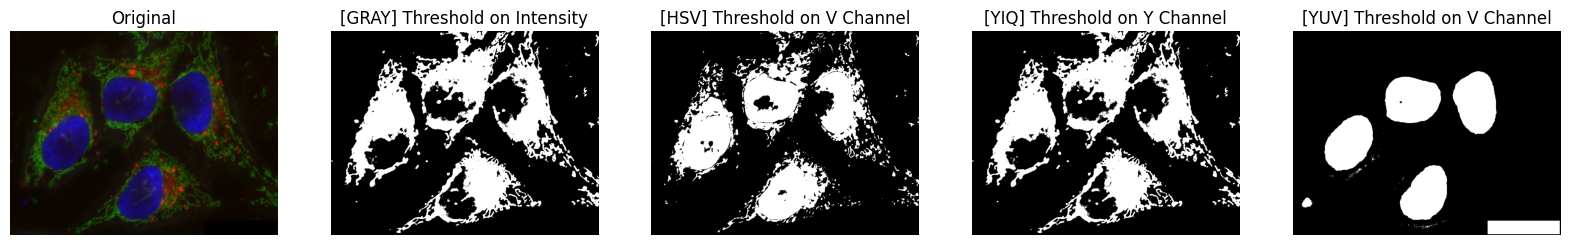

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cells_image = cv2.imread('images/hela-cells.png')
cells_image = cv2.cvtColor(cells_image, cv2.COLOR_BGR2RGB)

# In the gray scale space (intensity)
cells_gray  = cv2.cvtColor(cells_image, cv2.COLOR_RGB2GRAY)
thr_gray    = threshold_otsu(cells_gray.ravel())
edges_gray  = cells_gray > thr_gray
print(f"[GRAY] Intensity thr: {thr_gray}")

# In the HSV space (brightness)
cells_hsv   = cv2.cvtColor(cells_image, cv2.COLOR_RGB2HSV)[:, :, 2] # V channel
thr_hsv     = threshold_otsu(cells_hsv.ravel())
edges_hsv   = cells_hsv > thr_hsv
print(f"[HSV] V-channel thr: {thr_hsv}")

# In the YIQ space (luminance)
cells_yiq   = color.rgb2yiq( cells_image )[:, :, 0] # Y channel
thr_yiq     = threshold_otsu(cells_yiq.ravel())
edges_yiq   = cells_yiq > thr_yiq
print(f"[YIQ] Y-channel thr: {thr_yiq}")

# Convert to YUV color space and extract U channel (chromatic component)
cells_yuv = cv2.cvtColor(cells_image, cv2.COLOR_BGR2YUV)
thr_yuv_u   = threshold_otsu( cells_yuv[:, :, 1].ravel())
edges_yuv_u = (cells_yuv[:, :, 1] < thr_yuv_u) # U channel
thr_yuv_v   = threshold_otsu( cells_yuv[:, :, 2].ravel())
edges_yuv_v = (cells_yuv[:, :, 2] > thr_yuv_u) # V channel
print(f"[YUV] U-channel thr: {thr_yuv_u} | V-channel thr: {thr_yuv_v}")

# Display results
plt.figure(figsize=(20, 20))
plt.subplot(1, 5, 1), plt.imshow(cells_image), plt.title('Original'), plt.axis('off')
plt.subplot(1, 5, 2), plt.imshow(edges_gray,  cmap='gray'), plt.title('[GRAY] Threshold on Intensity'), plt.axis('off')
plt.subplot(1, 5, 3), plt.imshow(edges_hsv,   cmap='gray'), plt.title('[HSV] Threshold on V Channel'),  plt.axis('off')
plt.subplot(1, 5, 4), plt.imshow(edges_yiq,   cmap='gray'), plt.title('[YIQ] Threshold on Y Channel'),  plt.axis('off')
plt.subplot(1, 5, 5), plt.imshow(edges_yuv_u, cmap='gray'), plt.title('[YUV] Threshold on U Channel'),  plt.axis('off')
plt.subplot(1, 5, 5), plt.imshow(edges_yuv_v, cmap='gray'), plt.title('[YUV] Threshold on V Channel'),  plt.axis('off')

plt.show()


## Answers
**Q5.1: can you? (isolate the nuclei using the intensity component only)**

No, it's not possible. The center of the cell nuclei is darker than the borders, so increasing the intensity threshold causes most of the cell to be included, rather than isolating just the nuclei.

**Q5.2: What about using another other component?**

Yes, using the V chromatic component of the YUV color space, it is possible to isolate the cell nuclei effectively. The blue color of the nuclei is well-represented in this component, making it easier to separate them from the rest of the image.


# Egela submission
Copy this notebook to your Drive and solve the proposed exercises there.

Rename the notebook as `assignment-3-name1-surname1-name2-surname2.ipynb` (replace *name1-surname1* and *name2-surname2* with team member names and surnames).

Use the "share" button and make sure you configure such that "Anyone on the Internet with this link can view".

Copy the link provided by the "share" menu and paste it here. Only one member of the team should submit the notebook

<font color=red>**Important**</font>: Make sure the notebook is <u>fully run</u> with the "traces" visible (run times) and <u>all questions have been answered</u> when you submit.

**Submission deadline:** Sunday, February 16th 2025, 0:00h.